<a href="https://colab.research.google.com/github/math-sousa/Star-classification-NASA/blob/main/Star_Classification_Math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STAR CLASSIFICATION - NASA**

# **DESCRIBING THE PROBLEM**

The problem will be described here, later.

In [7]:
#importing dataset from github
path = 'https://raw.githubusercontent.com/math-sousa/Star-classification-NASA/main/Stars.csv'

In [142]:
#importing essencial libraries

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [9]:
stars = pd.read_csv(path, sep=',')

In [18]:
stars

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [24]:
stars.columns = ['Temperature', 'Luminosity', 'Radius', 'Magnitude', 'Color', 'Spectral_class', 'Type'] #rename columns
stars

,Temperature,Luminosity,Radius,Magnitude,Color,Spectral_class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


#**EXPLORATORY DATA ANALYSIS**

In [26]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   Luminosity      240 non-null    float64
 2   Radius          240 non-null    float64
 3   Magnitude       240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [27]:
stars.isna().sum() #verify amount of data == null

Temperature       0
Luminosity        0
Radius            0
Magnitude         0
Color             0
Spectral_class    0
Type              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


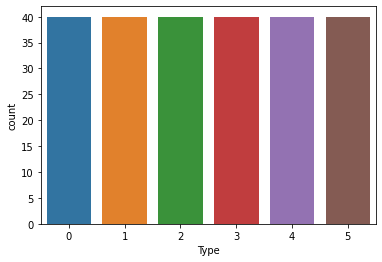

In [31]:
sns.countplot(stars['Type'])

In [25]:
stars.describe() #descriptive stats

,Temperature,Luminosity,Radius,Magnitude,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


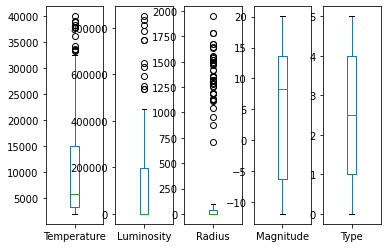

In [38]:
stars.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

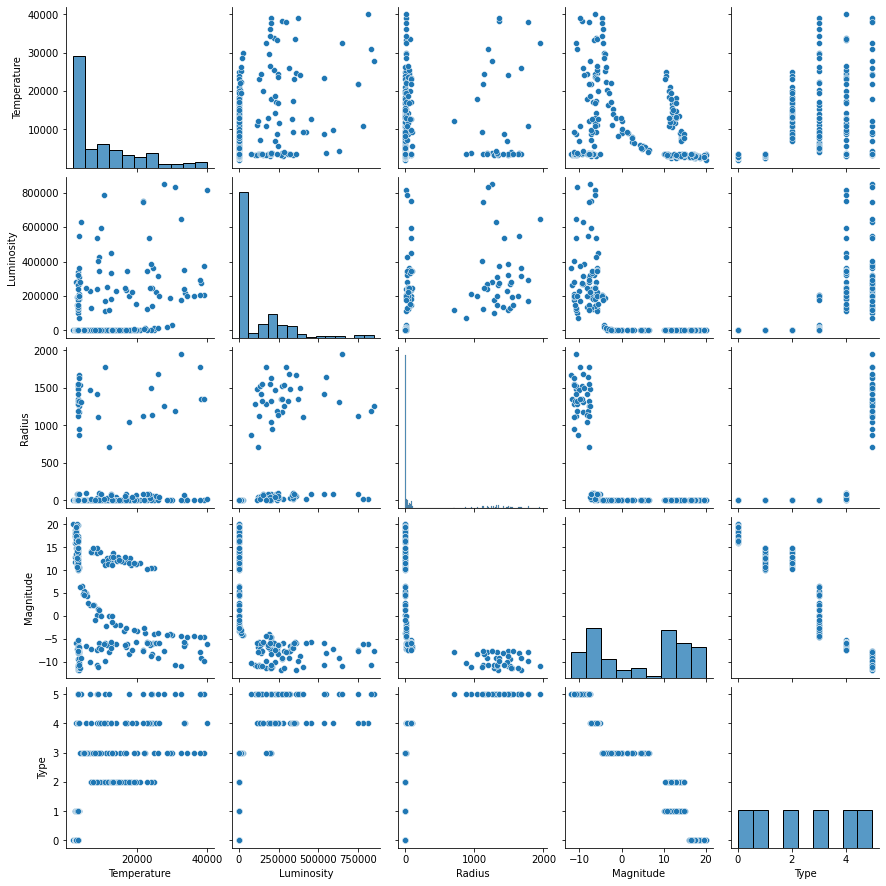

In [41]:
sns.pairplot(stars) #plot graphs in pairs

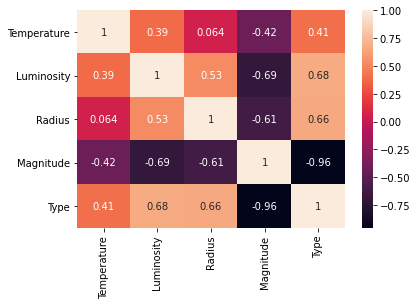

In [43]:
sns.heatmap(stars.corr(), annot=True) #correlation matrix

'Temperature' is the least relevant feature (corr = 0.41), whilst 'Magnitude' is the most relevant feature (corr = -0.96).

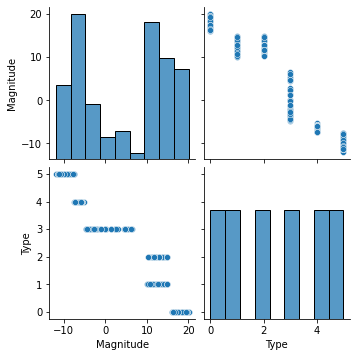

In [46]:
pair = stars[['Magnitude', 'Type']]
sns.pairplot(pair)

# DATA PRE-PROCESSING

In [78]:
stars = stars.drop(['Color', 'Spectral_class'], axis=1)

In [79]:
stars.head()

,Temperature,Luminosity,Radius,Magnitude,Type
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0


In [83]:
X = stars[stars.columns[:-1]]
scaler = StandardScaler()
stars[stars.columns[:-1]] = scaler.fit_transform(X) # Standardized features

In [85]:
stars.head()

,Temperature,Luminosity,Radius,Magnitude,Type
0,-0.779382,-0.598624,-0.459210,1.116745,0
1,-0.782110,-0.598624,-0.459241,1.162414,0
2,-0.828477,-0.598624,-0.459342,1.362213,0
3,-0.807496,-0.598624,-0.459229,1.167171,0
4,-0.897819,-0.598624,-0.459340,1.491607,0


In [129]:
X = stars[stars.columns[:-1]]
y = stars['Type']
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.30, random_state=42, shuffle=True)

In [131]:
print(f"Features' shape: {X.shape}")
print(f"Label's shape: {y.shape}")

Features' shape: (240, 4)
Label's shape: (240,)


In [130]:
print(f"Train data's shape {X_train.shape}")
print(f"Test data's shape {X_test.shape}")

Train data's shape (168, 4)
Test data's shape (72, 4)


In [132]:
X_train

,Temperature,Luminosity,Radius,Magnitude
29,-0.342771,-0.598624,-0.459514,0.922655
124,-0.732910,-0.598624,-0.459328,1.211888
75,-0.767633,-0.598624,-0.458861,0.701924
82,-0.164433,-0.598624,-0.459521,0.894112
5,-0.803300,-0.598624,-0.459326,1.198568
...,...,...,...,...
106,1.482563,1.428652,-0.337465,-0.971633
14,-0.823232,-0.598624,-0.459268,0.704017
92,-0.673534,-0.598623,-0.457999,0.175595
179,1.467876,0.789139,1.738775,-1.200927


# PREDICTIVE MODEL

In [116]:
param_grid = [
    {'kernel':['linear'], 'C':[1, 10, 100]},
    {'kernel':['poly'], 'C':[1, 10, 100], 'degree':[2, 3, 4]},
    {'kernel':['rbf'], 'C':[1, 10, 100], 'gamma':[1e-1, 1e-2, 1e-3]}
]

In [117]:
pred = SVC()

pred_grid = GridSearchCV(pred, param_grid, scoring='accuracy') #cross-validation: cv = 5 (default)
pred_grid.fit(X=X_train, y=y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'degree': [2, 3, 4],
                          'kernel': ['poly']},
                         {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [118]:
results = pd.DataFrame(pred_grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_degree,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002618,0.001277,0.001541,0.000657,1,linear,NaN,NaN,"{'C': 1, 'kernel': 'linear'}",0.941176,1.000000,0.911765,0.939394,0.939394,0.946346,0.028976,12
1,0.001841,0.000082,0.000936,0.000030,10,linear,NaN,NaN,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
2,0.001767,0.000061,0.000992,0.000093,100,linear,NaN,NaN,"{'C': 100, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,0.969697,0.993939,0.012121,4
3,0.002080,0.000108,0.000954,0.000049,1,poly,2,NaN,"{'C': 1, 'degree': 2, 'kernel': 'poly'}",0.911765,0.941176,0.941176,0.939394,0.939394,0.934581,0.011436,13
4,0.002345,0.000638,0.001226,0.000432,1,poly,3,NaN,"{'C': 1, 'degree': 3, 'kernel': 'poly'}",0.882353,0.764706,0.852941,0.818182,0.969697,0.857576,0.068386,17
5,0.002087,0.000020,0.000947,0.000021,1,poly,4,NaN,"{'C': 1, 'degree': 4, 'kernel': 'poly'}",0.764706,0.735294,0.764706,0.757576,0.818182,0.768093,0.027270,18
6,0.002051,0.000407,0.001009,0.000233,10,poly,2,NaN,"{'C': 10, 'degree': 2, 'kernel': 'poly'}",0.970588,0.970588,1.000000,0.969697,1.000000,0.982175,0.014558,6
7,0.002146,0.000666,0.001163,0.000506,10,poly,3,NaN,"{'C': 10, 'degree': 3, 'kernel': 'poly'}",1.000000,0.970588,1.000000,1.000000,1.000000,0.994118,0.011765,2
8,0.001918,0.000064,0.000933,0.000017,10,poly,4,NaN,"{'C': 10, 'degree': 4, 'kernel': 'poly'}",0.941176,0.970588,1.000000,0.969697,1.000000,0.976292,0.022060,8
9,0.001847,0.000042,0.000940,0.000032,100,poly,2,NaN,"{'C': 100, 'degree': 2, 'kernel': 'poly'}",0.970588,0.970588,1.000000,0.969697,1.000000,0.982175,0.014558,6


In [119]:
pred_grid.best_params_

{'C': 10, 'kernel': 'linear'}

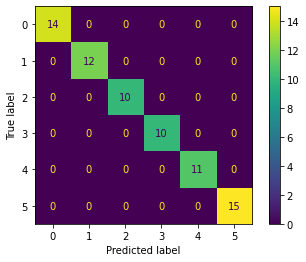

In [120]:
plot_confusion_matrix(pred_grid, X_test, y_test) 
plt.show()

In [138]:
y_pred = pred_grid.predict(X_test)
cr = classification_report(y_test, y_pred)

In [141]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [144]:
pred_grid.score(X_test, y_test)

1.0